# ANN RNN Project - LSTM

*Long Short Term Memory* (LSTM) are recurrent neural networks (RNN) that "remember" values at certain intervals, and are suitable for classifying, processing, and predicting time series.

For this project, the task chosen was forecasting. The model receives data from a time series (car sales dataset) and predicts a future value. A 5-month window was chosen. For the forecast, the last 6 months of the dataset were chosen, and the last month is the month we want to forecast, and in this way we can compare the predicted with the actual.

## Dataset

The monthly car sales dataset describes the number of car sales in Quebec, Canada, between 1960 and 1968, in thousands of units. Units are a count of the number of sales and there are 108 observations. Data sources are [6], [7] and [8]. The first 5 lines of the .csv file dataset are:

     "Month","Sales"
     "1960-01",6550
     "1960-02",8728
     "1960-03",12026
     "1960-04",14395


Dataset links:

- https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv
- https://www.kaggle.com/datasets/dinirimameev/monthly-car-sales-in-quebec-1960

## Library

In [3]:
import numpy as np
from numpy import sqrt
from numpy import asarray
from pandas import read_csv
import os
import random as python_random
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot
import matplotlib.pyplot as plt

## Auxiliary functions

In [35]:
def rseed():
    random_seed = 123
    python_random.seed(random_seed)
    np.random.seed(random_seed)
    tf.random.set_seed(random_seed)
    os.environ['PYTHONHASHSEED'] = str(random_seed)
rseed()

In [36]:
def curva():
    plt.title('Learning Curves')
    plt.xlabel('Epoch')
    plt.ylabel('Cross Entropy')
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='val')
    plt.legend()
    plt.show()

Function that divides a univariate sequence into samples:

In [7]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence) - 1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return asarray(X), asarray(y)

Load the dataset:

In [8]:
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = read_csv(path, header=0, index_col=0).squeeze("columns")

In [9]:
print(df.head(5))

Month
1960-01     6550
1960-02     8728
1960-03    12026
1960-04    14395
1960-05    14587
Name: Sales, dtype: int64


Get only the values:

In [10]:
values = df.values.astype('float32')

Shows the number of new vehicles sold per month in the province of Quebec in Canada, between 1960 and 1968:

In [11]:
np.set_printoptions(linewidth=110)
values

array([ 6550.,  8728., 12026., 14395., 14587., 13791.,  9498.,  8251.,  7049.,  9545.,  9364.,  8456.,
        7237.,  9374., 11837., 13784., 15926., 13821., 11143.,  7975.,  7610., 10015., 12759.,  8816.,
       10677., 10947., 15200., 17010., 20900., 16205., 12143.,  8997.,  5568., 11474., 12256., 10583.,
       10862., 10965., 14405., 20379., 20128., 17816., 12268.,  8642.,  7962., 13932., 15936., 12628.,
       12267., 12470., 18944., 21259., 22015., 18581., 15175., 10306., 10792., 14752., 13754., 11738.,
       12181., 12965., 19990., 23125., 23541., 21247., 15189., 14767., 10895., 17130., 17697., 16611.,
       12674., 12760., 20249., 22135., 20677., 19933., 15388., 15113., 13401., 16135., 17562., 14720.,
       12225., 11608., 20985., 19692., 24081., 22114., 14220., 13434., 13598., 17187., 16119., 13713.,
       13210., 14251., 20139., 21725., 26099., 21084., 18024., 16722., 14385., 21342., 17180., 14577.],
      dtype=float32)

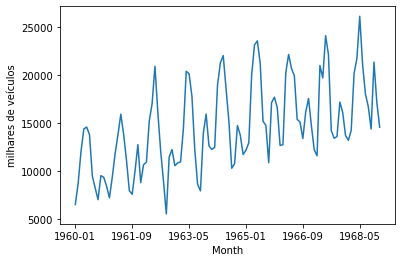

In [12]:
plt.ylabel('milhares de veículos')
df.plot();

The line graph of the data shows both an annual seasonal component and an upward trend.

Size of samples to be divided:

In [13]:
n_steps = 5

Selects the numbers 18024.0, 16722.0, 14385.0, 21342.0, 17180.0 that correspond to the last numbers in the dataset, where the value 14577 is the real value that must be predicted:

In [14]:
prever = values[-6:-1].reshape(1, n_steps, 1)

In [15]:
real = values[-1]

Separate the samples:

In [16]:
X, y = split_sequence(values, n_steps)

Remodels in [samples, timesteps, features] :

In [17]:
X = X.reshape((X.shape[0], X.shape[1], 1))

The dataset is divided into training and testing :

In [18]:
n_test = 12

In [19]:
X_train, X_test, y_train, y_test = X[:-n_test], X[-n_test:], y[:-n_test], y[-n_test:]

In [20]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((91, 5, 1), (12, 5, 1), (91,), (12,))

## LSTM using 2 neurons:

In [21]:
neurons = 2

In [43]:
rseed()  # try to make it reproducible

Defines the template. As the dataset of cars has a value at each time step, the last layer has an output. And since the window has 5 values, the input layer has 5 neurons:

In [24]:
model1 = Sequential()
model1.add(LSTM(neurons, input_shape=(n_steps, 1)))
model1.add(Dense(1))

In [25]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 2)                 32        
                                                                 
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


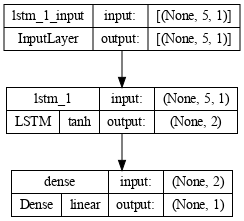

In [26]:
plot_model(model1, show_shapes=True, show_layer_activations=True, dpi=72)

Compiles the model. "SGD" is the gradient descent (with momentum) optimizer. Metrics are also computed during training:

In [27]:
model1.compile(optimizer='sgd', loss='mse', metrics=['mae'])

Training including validation data:

In [28]:
history = model1.fit(X_train, y_train, epochs=100, 
                     verbose=2, validation_data=(X_test, y_test))

Epoch 1/100


2022-08-19 11:25:35.731818: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100


3/3 - 3s - loss: 216155328.0000 - mae: 14033.0361 - val_loss: 316329120.0000 - val_mae: 17387.1562 - 3s/epoch - 1s/step
Epoch 2/100
3/3 - 0s - loss: 193692016.0000 - mae: 13202.4893 - val_loss: 289496864.0000 - val_mae: 16597.6191 - 37ms/epoch - 12ms/step
Epoch 3/100
3/3 - 0s - loss: 173808112.0000 - mae: 12431.5059 - val_loss: 265321872.0000 - val_mae: 15852.6328 - 40ms/epoch - 13ms/step
Epoch 4/100
3/3 - 0s - loss: 156179376.0000 - mae: 11698.9922 - val_loss: 243631744.0000 - val_mae: 15153.0811 - 34ms/epoch - 11ms/step
Epoch 5/100
3/3 - 0s - loss: 140549456.0000 - mae: 11025.6650 - val_loss: 223932032.0000 - val_mae: 14488.4834 - 38ms/epoch - 13ms/step
Epoch 6/100
3/3 - 0s - loss: 126665128.0000 - mae: 10350.9385 - val_loss: 206441648.0000 - val_mae: 13871.7607 - 33ms/epoch - 11ms/step
Epoch 7/100
3/3 - 0s - loss: 114484280.0000 - mae: 9746.5859 - val_loss: 190670720.0000 - val_mae: 13291.1562 - 38ms/epoch - 13ms/step
Epoch 8/100
3/3 - 0s - loss: 103657008.0000 - mae: 9184.5449 - va

Returns the loss values and metrics for the model:

In [29]:
mse, mae = model1.evaluate(X_test, y_test, verbose=0)

MAE = mean squared error. Evaluates the absolute distance of the observations (the entries in the dataset) to the predictions in a regression by taking the average across all observations. Uses the absolute value of distances so that negative errors are correctly accounted for.

RMSE = root mean square error. Returns the MSE error to the original unit, using the square root, and keeping the property of penalizing higher errors.

In [30]:
print('RMSE: %.3f, MAE: %.3f' % (sqrt(mse), mae))

RMSE: 5451.940, MAE: 4141.424


## Prediction

Predicts what the next value in the sequence is:

In [32]:
o = model1.predict(prever)[0][0]

1/1 [==============================] - 0s 402ms/step


In [33]:
print(f'Predição: {o:.1f}, Real: {real:.1f}, Erro: {100*(real/o-1):.1f}%')

Predição: 14264.9, Real: 14577.0, Erro: 2.2%


# Learning curve

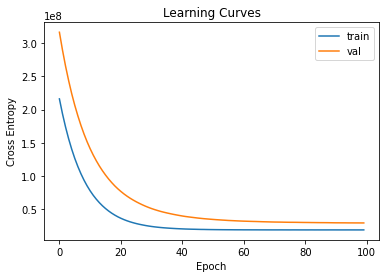

In [37]:
curva()

## Same experiment as before, now with 3 neurons

RMSE: 5451.940, MAE: 4141.424
1/1 [==============================] - 0s 367ms/step
Predição: 14264.9, Real: 14577.0, Erro: 2.2%


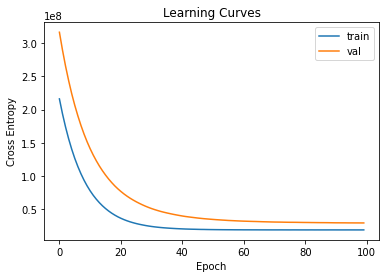

In [38]:
neurons = 3
rseed()
model4 = Sequential()
model4.add(LSTM(neurons, input_shape=(n_steps, 1)))
model4.add(Dense(1))
model4.compile(loss='mse', optimizer="sgd", metrics=['mae'])
history = model4.fit(X_train, y_train, epochs=100,
                     verbose=0, validation_data=(X_test, y_test))
mse, mae = model4.evaluate(X_test, y_test, verbose=0)
print('RMSE: %.3f, MAE: %.3f' % (sqrt(mse), mae))
o = model4.predict(prever)[0][0]
print(f'Predição: {o:.1f}, Real: {real:.1f}, Erro: {100*(real/o-1):.1f}%')
curva()

Regarding 2 neurons, the error remained.

## 4 neurons

RMSE: 5423.858, MAE: 4115.611
1/1 [==============================] - 1s 511ms/step
Predição: 14303.6, Real: 14577.0, Erro: 1.9%


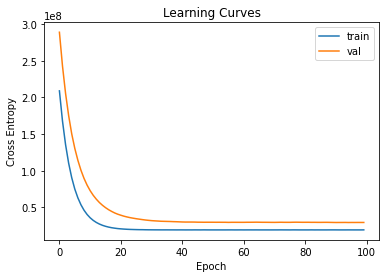

In [39]:
neurons = 4
rseed()
model4 = Sequential()
model4.add(LSTM(neurons, input_shape=(n_steps, 1)))
model4.add(Dense(1))
model4.compile(loss='mse', optimizer="sgd", metrics=['mae'])
history = model4.fit(X_train, y_train, epochs=100,
                     verbose=0, validation_data=(X_test, y_test))
mse, mae = model4.evaluate(X_test, y_test, verbose=0)
print('RMSE: %.3f, MAE: %.3f' % (sqrt(mse), mae))
o = model4.predict(prever)[0][0]
print(f'Predição: {o:.1f}, Real: {real:.1f}, Erro: {100*(real/o-1):.1f}%')
curva()

With 4 neurons the error decreases.

## 8 neurons

RMSE: 5422.288, MAE: 4114.165
1/1 [==============================] - 0s 371ms/step
Predição: 14305.8, Real: 14577.0, Erro: 1.9%


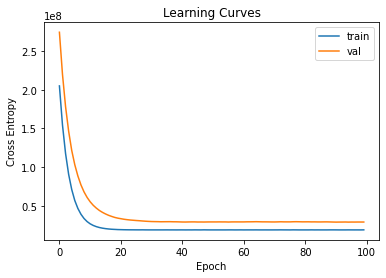

In [40]:
neurons = 8
rseed()
model4 = Sequential()
model4.add(LSTM(neurons, input_shape=(n_steps, 1)))
model4.add(Dense(1))
model4.compile(loss='mse', optimizer="sgd", metrics=['mae'])
history = model4.fit(X_train, y_train, epochs=100,
                     verbose=0, validation_data=(X_test, y_test))
mse, mae = model4.evaluate(X_test, y_test, verbose=0)
print('RMSE: %.3f, MAE: %.3f' % (sqrt(mse), mae))
o = model4.predict(prever)[0][0]
print(f'Predição: {o:.1f}, Real: {real:.1f}, Erro: {100*(real/o-1):.1f}%')
curva()

With 8, the error does not decrease. For this particular model dataset, the best would be to use 4 neurons in the LSTM layer as it is the minimum that presents the best result in the tests performed.

# References

- [1] Notas de aula. CAP-351. Prof. M. G. Quiles
- [2] https://machinelearningmastery.com/seasonal-persistence-forecasting-python
- [3] https://machinelearningmastery.com/tensorflow-tutorial-deep-learning-with-tf-keras
- [4] https://github.com/senadkurtisi/Univariate-Time-Series-Forecasting
- [5] https://pkg.yangzhuoranyang.com/tsdl/index.html
- [6] https://www.kaggle.com/datasets/dinirimameev/monthly-car-sales-in-quebec-1960
- [7] Abraham, B., and Ledolter, J. (1983). Statistical Methods for Forecasting. ISBN: 9780471867647,0471867640
- [8] Government of Canada Publications. NEW MOTOR VEHICLE SALES AND MOTOR VEHICLE FINANCING 1960.
- https://publications.gc.ca/site/archivee-archived.html?url=https://publications.gc.ca/collections/collection_2018/statcan/63-208/CS63-208-1960-eng.pdf
- [9] https://towardsdatascience.com/predicting-sales-611cb5a252de
- [10] https://machinelearningmastery.com/time-series-forecasting-long-short-term-memory-network-python/